In [1]:
import numpy as np
import matplotlib.pyplot as plt
from acf import *
from scipy.optimize import curve_fit

In [2]:
size = 1_000
n_steps = 10_000_000
beta = 1.0
J = 1.0
h = 0.0

In [3]:
corr = acf_multi(300, size, n_steps, beta, J, h)

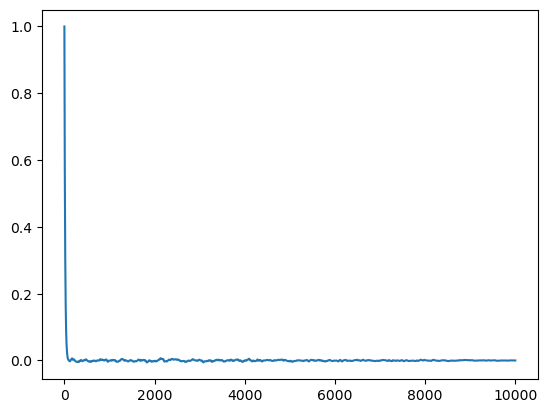

In [4]:
plt.plot(corr)

In [5]:
def exponential_decay(x, tau, a=1):
    return a * np.exp(-x/tau)

In [6]:
x = np.arange(corr.shape[0])

In [7]:
params, _ = curve_fit(exponential_decay, x, corr)

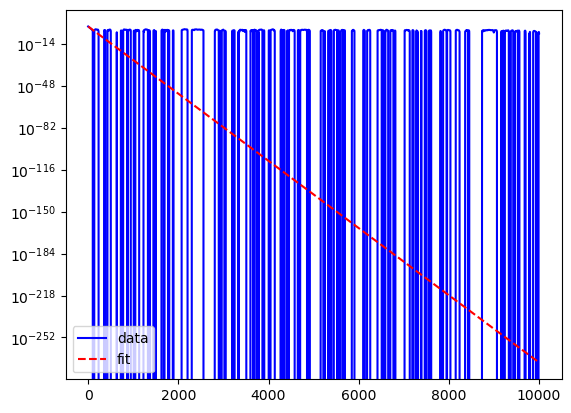

In [8]:
plt.plot(x, corr, 'b-', label='data')
plt.plot(x, exponential_decay(x, *params), 'r--', label='fit')
plt.yscale('log')
plt.legend();

In [9]:
params

array([15.95063771,  0.99995402])

In [10]:
tau = 1/2
for i in x:
    tau += corr[i]
    if i >= 6 * tau:
        break
    else:
        continue

In [11]:
tau

16.83411979567668